<a href="https://colab.research.google.com/github/varunraisinghal/CSE151A-MachineLearningFinalProject/blob/main/CSE151A_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Final Project

### Team Members

| Name    | Email Address      | Major                  | Pronouns |
|---------|--------------------|------------------------|----------|
| Amit    | anamburi@ucsd.edu  | Computer Science       | He/him   |
| Varun   | vsinghal@ucsd.edu  | Computer Science       | He/Him   |
| Eric    | e7tran@ucsd.edu    | Computer Science       | He/Him   |
| Brian   | bwlee@ucsd.edu     | ECE Computer Engineering | N/A    |
| Thomas  | tjoel@ucsd.edu     | Computer Science       | He/him   |
| Jason   | jsliang@ucsd.edu   | Computer Engineering   | He/him   |
| Desiree | dalcanta@ucsd.edu  | Computer Science       | She/her  |
| Tian   | xxxx@ucsd.edu    | Computer Science       | He/him   |


## Exploratory Data Analysis

# Exploratory Data Analysis: Spotify 2023 Dataset

The Spotify 2023 dataset contains information about tracks on Spotify for the year 2023, including various metrics and features that describe the musical and popularity characteristics of each track.

## Dataset Overview

- **Total Entries:** 953 tracks
- **Columns:** 24

### Key Columns

- `track_name`: The name of the track.
- `artist(s)_name`: The artist(s) name for the track.
- `artist_count`: The number of artists for each track.
- `released_year`, `released_month`, `released_day`: Release date information.
- `in_spotify_playlists`, `in_spotify_charts`, `streams`: Spotify-related metrics.
- `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`: Metrics related to other streaming platforms.
- `bpm`: Beats per minute, indicating the tempo of the track.
- `key`, `mode`: Musical key and mode of the track.
- Various metrics in percentages (`danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`): Features representing the musical characteristics of each track.

### Observations

- Some columns have missing values (`in_shazam_charts`, `key`), which may require data imputation depending on the analysis or model building.
- Some columns are the wrong type (`in_shazam_charts`, `streams`), which will require erroneous data to be corrected and the feature colummns to be typecasted.
- The dataset contains a wide range of musical characteristics, indicating a diverse set of tracks.

## Analysis Steps

1. **Handling Missing Values:** Determine the best strategy for dealing with missing data (e.g., imputation, removal).
2. **Categorical Data Analysis:** Explore the distributions of categorical variables such as `artist(s)_name`, `key`, `mode`.
3. **Numerical Data Analysis:** Investigate the distributions of numerical features, identify any outliers, and understand the spread of data.
4. **Correlations:** Examine the relationships between numerical features, especially how different musical characteristics correlate with each other and with popularity metrics like streams and chart positions.
5. **Visualization:** Create various visualizations (histograms, scatter plots, box plots) to better understand the data distribution and the relationships between different variables.


Analysis of Spotify 2023 dataset provides insights into the musical and popularity dynamics of tracks on Spotify. This analysis can help identify trends, preferences, and the impact of various musical features on popularity metrics.


#### Imports

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#### Loading dataset


In [154]:
# download dataset
!wget https://raw.githubusercontent.com/varunraisinghal/CSE151A-MachineLearningFinalProject/main/spotify-2023.csv

# read in dataset
spotify_data = pd.read_csv('spotify-2023.csv', encoding = 'latin1', thousands = ',')

# look at the dataframe
spotify_data

--2024-02-22 01:35:18--  https://raw.githubusercontent.com/varunraisinghal/CSE151A-MachineLearningFinalProject/main/spotify-2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106270 (104K) [text/plain]
Saving to: ‘spotify-2023.csv.9’

spotify-2023.csv.9  100%[===================>] 103.78K  --.-KB/s    in 0.02s   

2024-02-22 01:35:18 (4.72 MB/s) - ‘spotify-2023.csv.9’ saved [106270/106270]



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [155]:
# look at the datatypes
spotify_data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

Ideally the datatypes should be either of `object` type for feature columns like `artist(s)_name`, or `int64` for numeric features. \
Attributes that should be `int64` like `in_shazam_charts` and `streams` likely have NaN (floats) or erroneous data, so we need to fix those.

#### Pre Processing Data

In [156]:
# check which attributes have null values
missing_values = spotify_data.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [157]:
# impute shazam charts as 0 if null (meaning 0 streams in shazam charts)
spotify_data['in_shazam_charts'].fillna(value = 0, inplace = True)

# change the datatype to int64
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].astype(np.int64)

# dropping key and mode for now as it doesn't help that much
spotify_data.drop(['key', 'mode'], axis = 1, inplace = True)

In [158]:
# see if the streams column can be typecast into np.int64, print error if not
for i, row in spotify_data.iterrows():
    try:
        np.int64(row['streams'])
    except Exception as error:
        print(error)

invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'


In [159]:
# remove the faulty row
spotify_data.drop(spotify_data[spotify_data['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index, inplace = True)

# convert the streams column to int64
spotify_data['streams'] = spotify_data['streams'].astype(np.int64)

# consolidate playlist counts into one total metric
in_total_playlists = (spotify_data['in_spotify_playlists'] + spotify_data['in_apple_playlists'] + spotify_data['in_deezer_playlists']).rename('in_total_playlists')

In [160]:
# spotify_data = spotify_data.drop(columns=['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']) #can drop the columns if needed
spotify_data = pd.concat([spotify_data, in_total_playlists.to_frame()], axis=1)
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_total_playlists
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,826,125,80,89,83,31,0,8,4,641
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,382,92,71,61,74,7,0,10,4,1580
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,949,138,51,32,53,17,0,31,6,1582
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,548,170,55,58,72,11,0,11,15,8099
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,425,144,65,23,80,14,63,11,6,3304


In [161]:
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
in_total_playlists       int64
dtype: object

In [162]:
# processing examples if needed
# -----------------------------------------------------------------------------------------------
# # min-max normalization
# mmScaler = MinMaxScaler()
# spotify_data['streams'] = mmScaler.fit_transform(spotify_data[['streams']])
# -----------------------------------------------------------------------------------------------
# # z-score standardization
# zScaler = StandardScaler()
# spotify_data['valence_%'] = zScaler.fit_transform(spotify_data[['valence_%']])
# -----------------------------------------------------------------------------------------------
# # convert certain column to decimals like the percentages
# spotify_data['energy_%'] = spotify_data['energy_%'] / 100
# -----------------------------------------------------------------------------------------------
# # label encode columns like artist(s)_name
# encoder = LabelEncoder()
# spotify_data['artist(s)_name_enc'] = encoder.fit_transform(spotify_data['artist(s)_name'])

In [163]:
# look at aggregate data
spotify_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_total_playlists
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,...,56.907563,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,5655.967437
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,...,157.513706,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,8919.088432
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,34.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,...,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,914.500000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,...,2.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2306.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,...,33.250000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,5995.250000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,...,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,62623.000000


#### Histograms Distribution Pattern

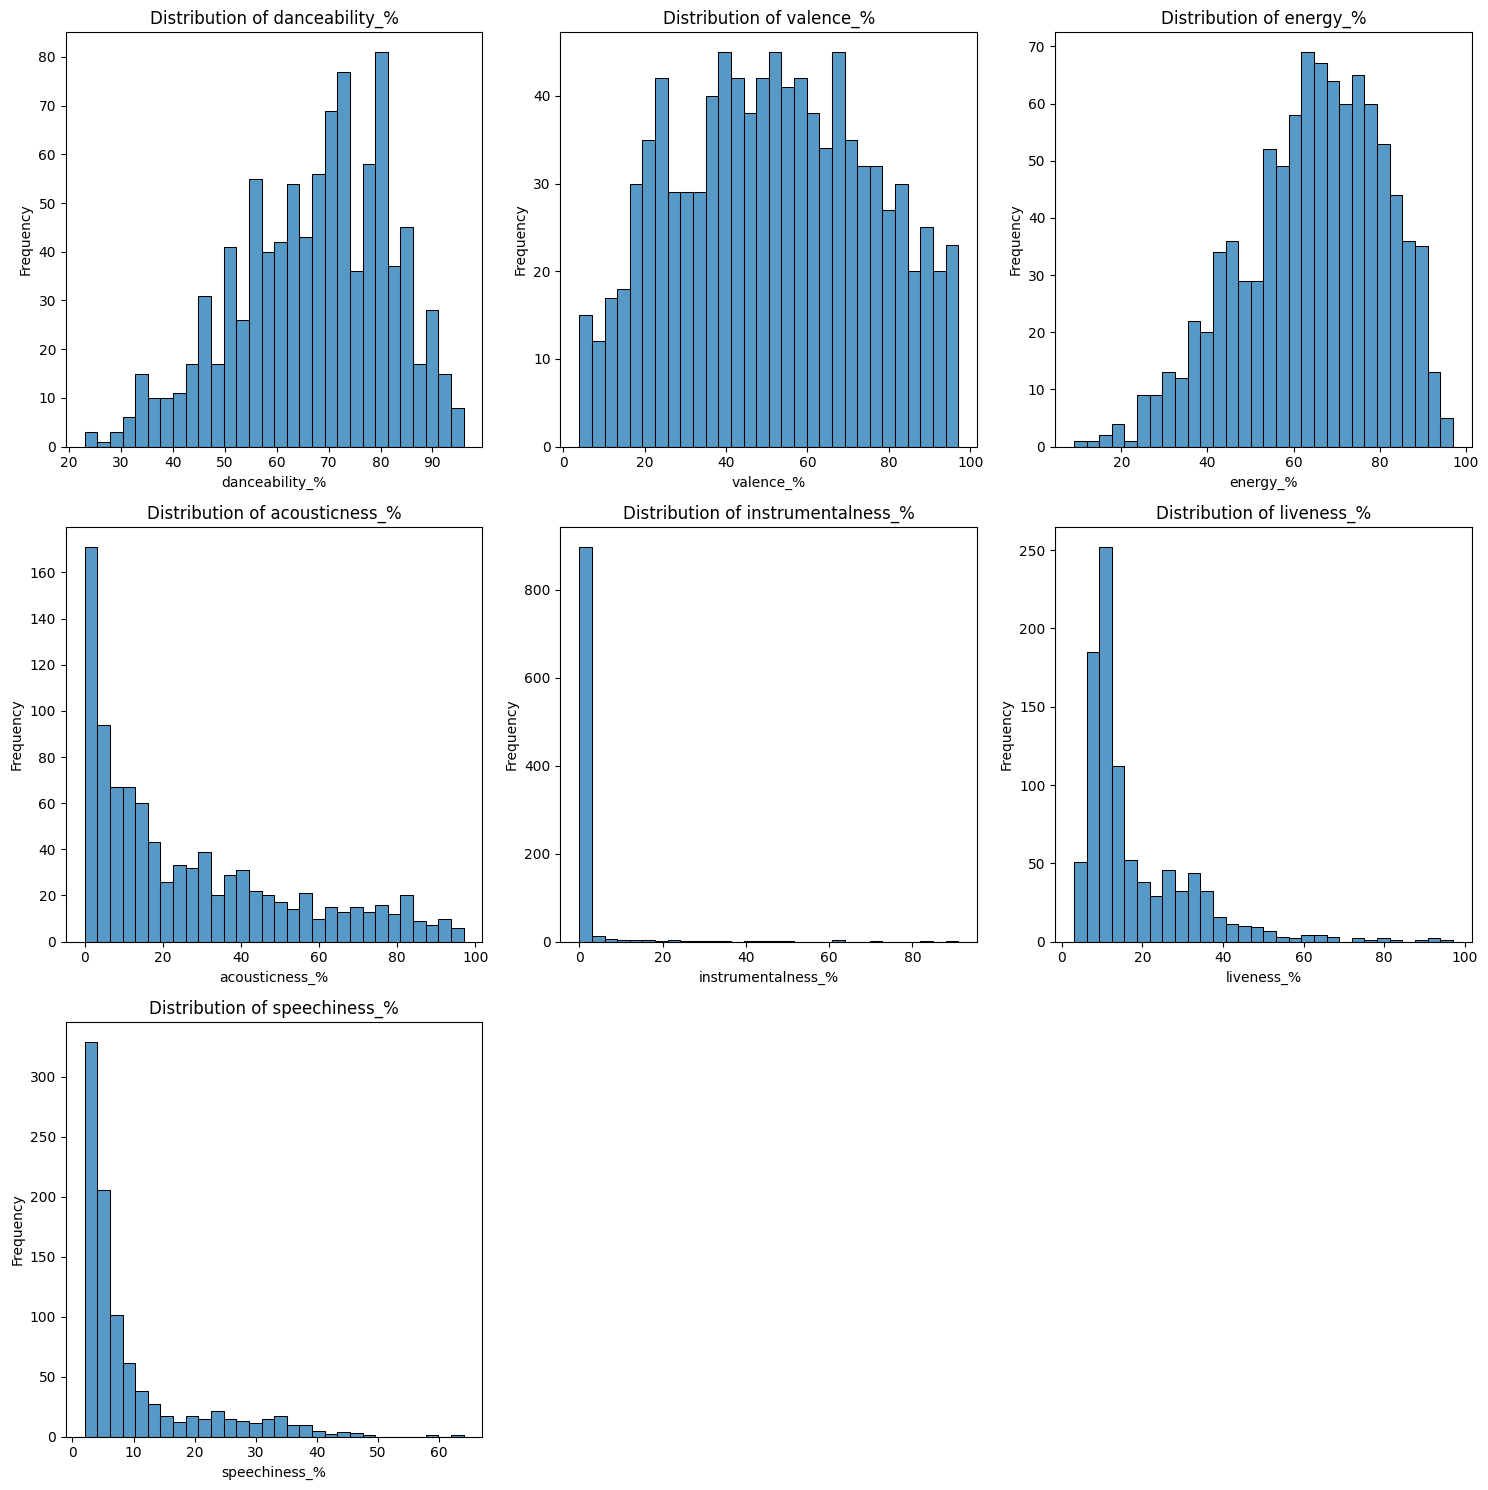

In [164]:
# audio property % features
features = [
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# all numerical features
num_features = [
    'artist_count', 	'released_year', 	'released_month', 	'released_day', 	'in_total_playlists',
    'in_spotify_charts', 	'streams', 	'in_apple_charts',
    'in_deezer_charts', 	'in_shazam_charts', 	'bpm', 	'danceability_%', 	'valence_%', 	'energy_%',
    'acousticness_%', 	'instrumentalness_%', 	'liveness_%', 	'speechiness_%'
]

# create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

# plot the feature histograms
for i, feature in enumerate(features):
    sns.histplot(spotify_data[feature], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for ax in axes[len(features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


#### Heatmap

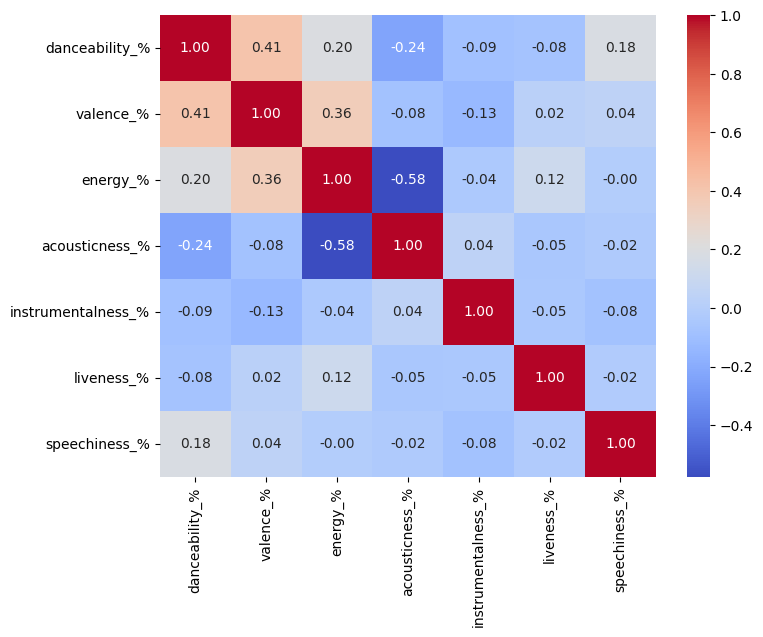

In [165]:
# generate heatmap for correlation between features
corr = spotify_data[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [166]:
# generate correlation between all numerical features and 'in_total_playlists'
num_corr = spotify_data[num_features].corrwith(spotify_data['in_total_playlists'])
num_corr

artist_count         -0.100118
released_year        -0.393610
released_month       -0.104530
released_day         -0.081583
in_total_playlists    1.000000
in_spotify_charts     0.158892
streams               0.783039
in_apple_charts       0.266219
in_deezer_charts      0.139775
in_shazam_charts      0.060166
bpm                  -0.021766
danceability_%       -0.104049
valence_%            -0.020281
energy_%              0.038781
acousticness_%       -0.065964
instrumentalness_%   -0.027693
liveness_%           -0.045270
speechiness_%        -0.088687
dtype: float64

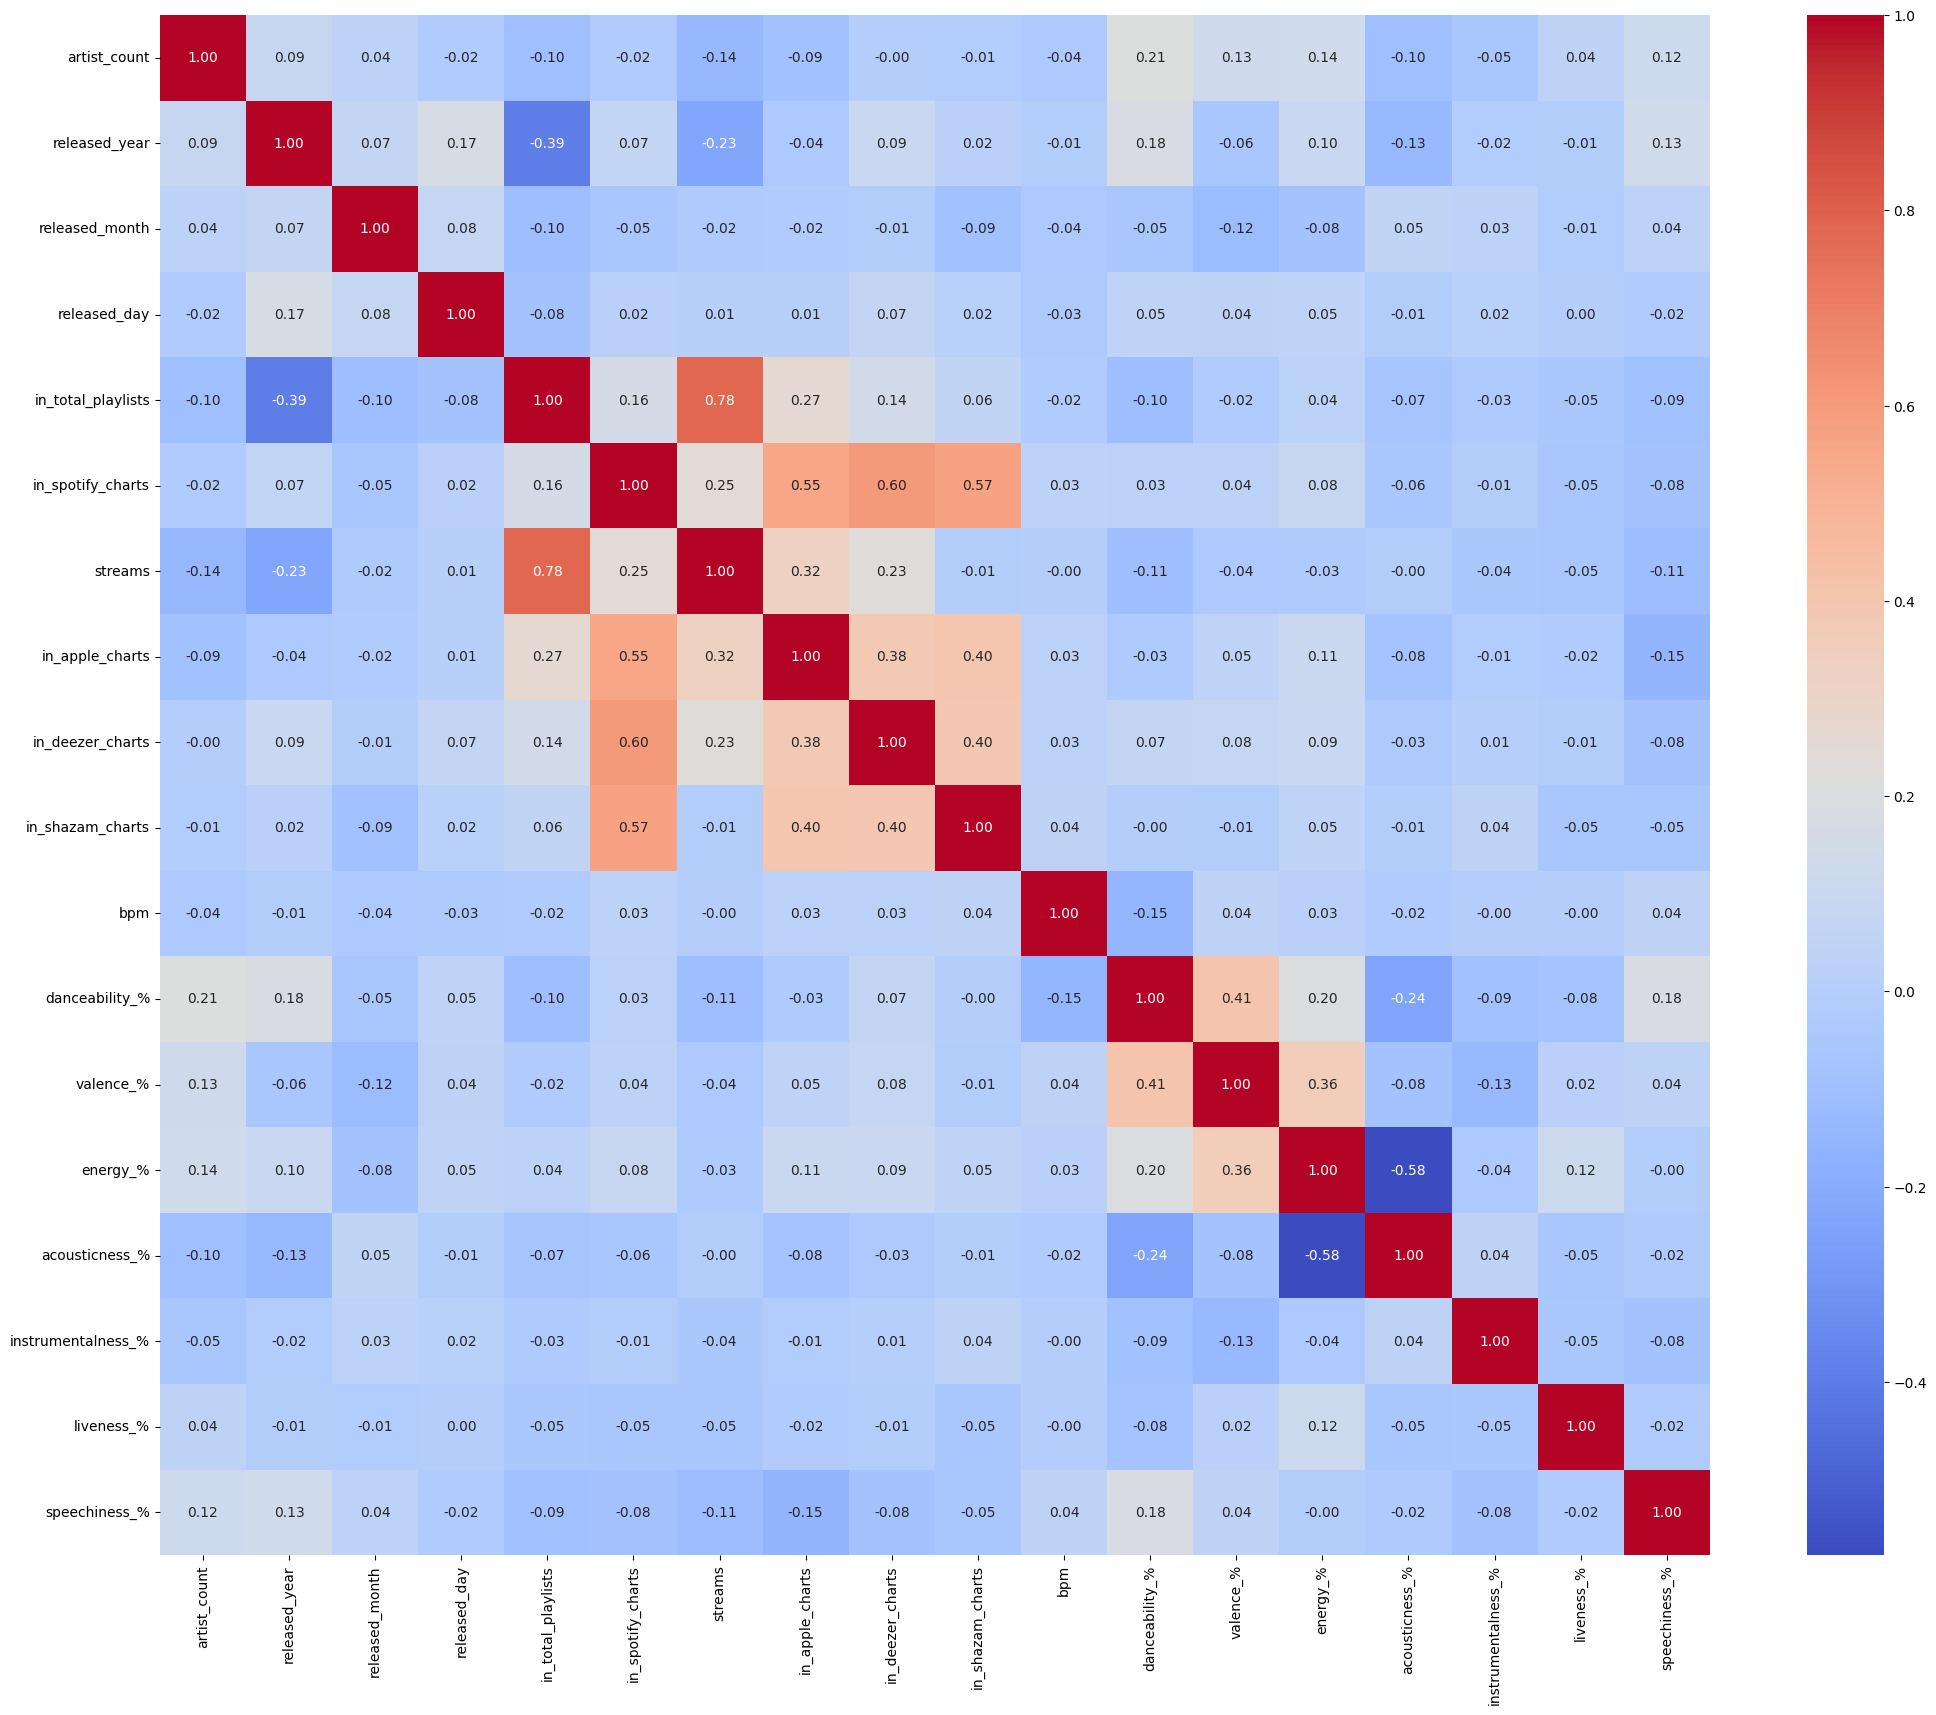

In [167]:
plt.figure(figsize=(25, 20))
sns.heatmap(spotify_data[num_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The 3 features with the highest linear correlation with in_total_playlists that are not also in_X_playlists features are streams (0.783039), released_year (-0.393610), and in_apple_charts (0.266219).

#### Pairplot

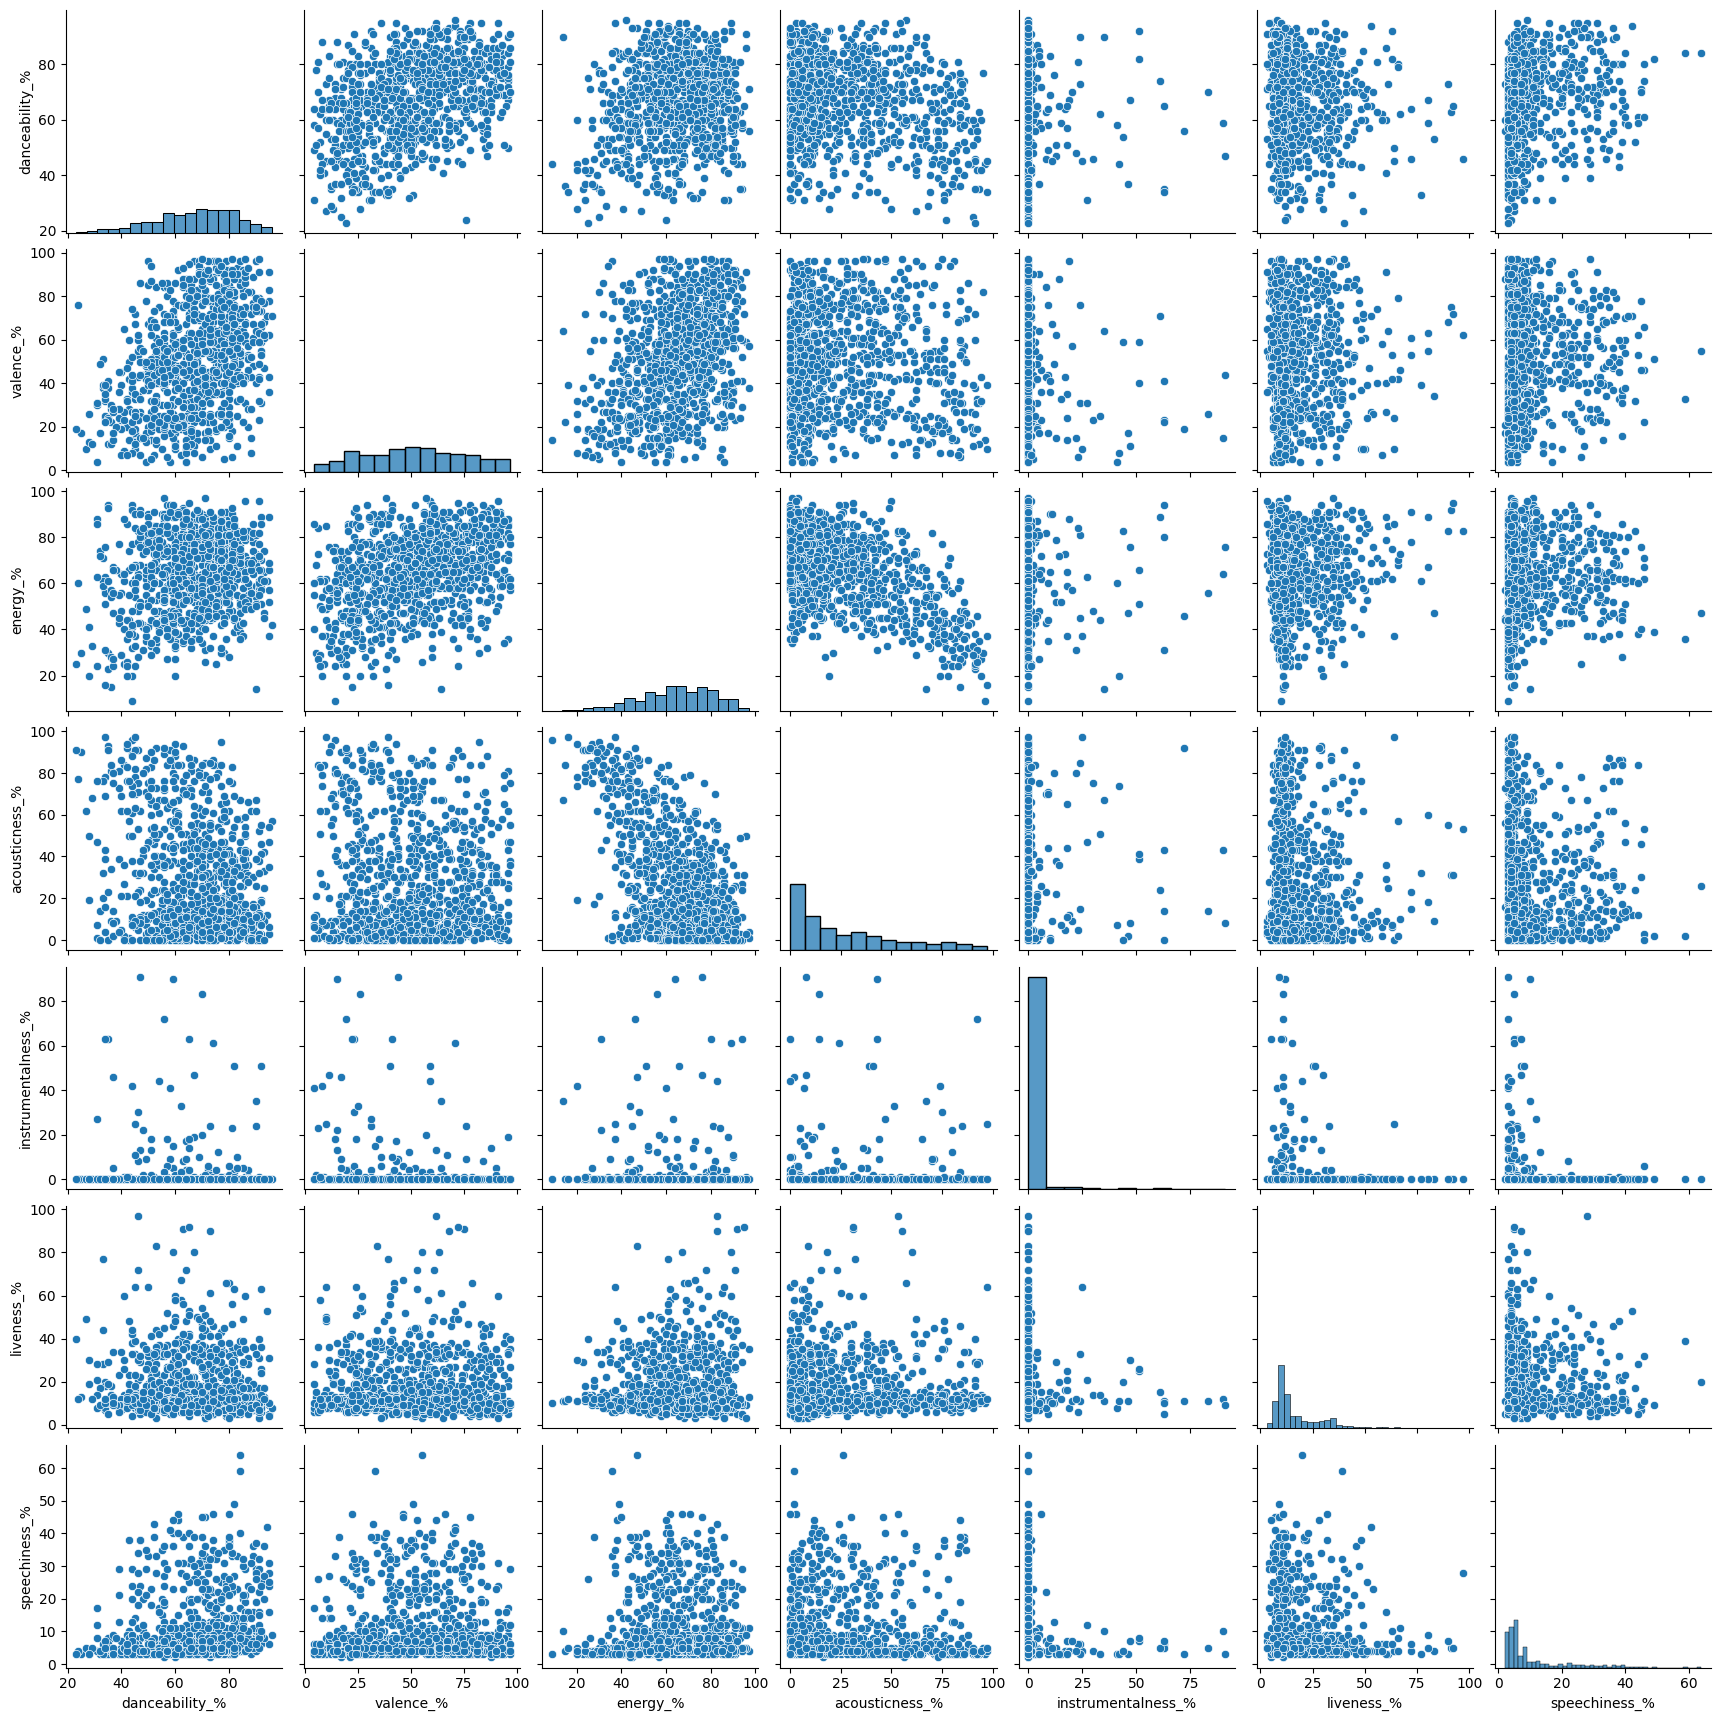

In [168]:
# generate pairplot to see trends between features
sns.pairplot(spotify_data[features])
plt.show()